In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('./DATA/cancer_classification.csv')

In [86]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

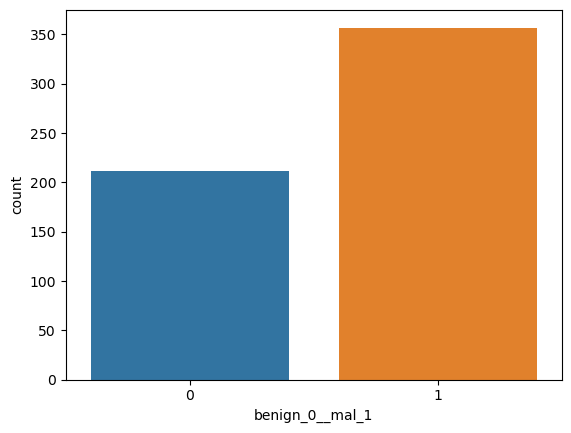

In [88]:
sns.countplot(x='benign_0__mal_1', data = df)

<Axes: >

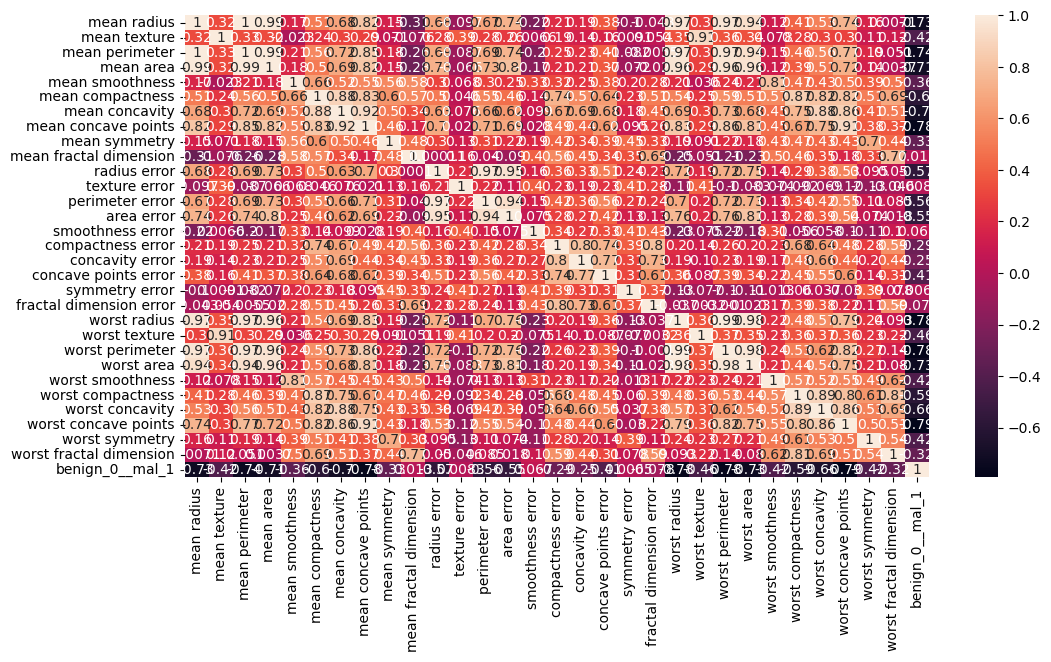

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True )

<Axes: >

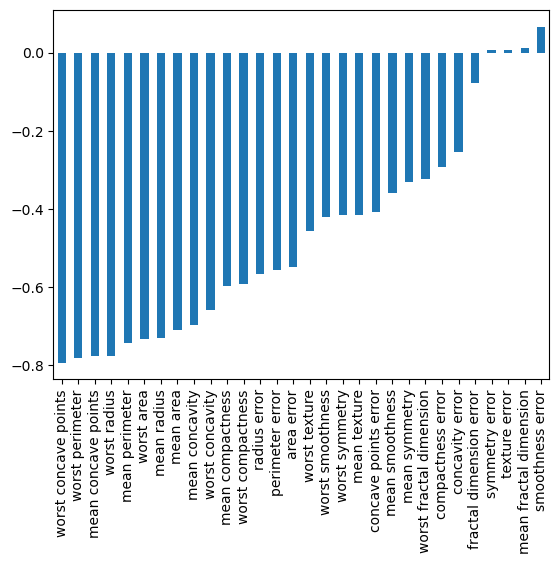

In [90]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [91]:
x = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1'].values

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler = MinMaxScaler()

In [96]:
x_train = scaler.fit_transform(x_train)

In [97]:
x_test = scaler.fit_transform(x_test)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [99]:
x_train.shape

(426, 30)

In [100]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [101]:
model.fit(x=x_train, y=y_train, epochs=600, validation_data=(x_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6745 - val_loss: 0.6425
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6445 - val_loss: 0.6118
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6155 - val_loss: 0.5794
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5848 - val_loss: 0.5425
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5488 - val_loss: 0.5014
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5083 - val_loss: 0.4586
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4662 - val_loss: 0.4139
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4130 - val_loss: 0.3414
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3494 - val_loss: 0.2937
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3049 - val_loss: 0.2569
Epoch 11

In [102]:
losses = pd.DataFrame(model.history.history)

<Axes: >

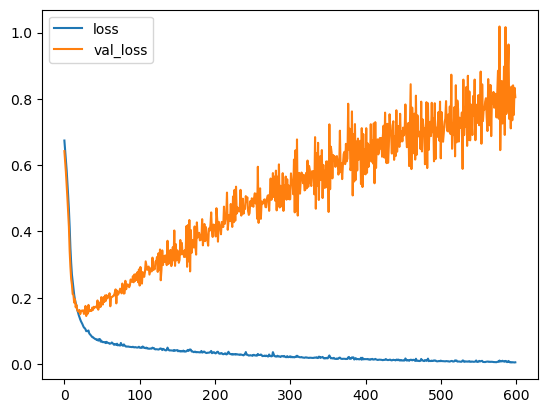

In [103]:
losses.plot()

In [104]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

In [106]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 2, patience = 25)

In [107]:
model.fit(x=x_train, y=y_train, epochs = 600, validation_data=(x_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6773 - val_loss: 0.6497
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6329 - val_loss: 0.6097
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5940 - val_loss: 0.5686
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5527 - val_loss: 0.5236
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5092 - val_loss: 0.4824
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4643 - val_loss: 0.4317
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4189 - val_loss: 0.3846
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3734 - val_loss: 0.3456
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3342 - val_loss: 0.3031
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3037 - val_loss: 0.2869
Epoch 11

<Axes: >

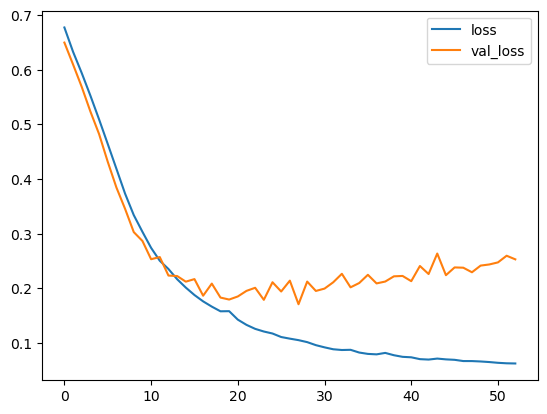

In [108]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [109]:
from tensorflow.keras.layers import Dropout

In [110]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [111]:
model.fit(x=x_train, y=y_train, epochs=600, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6956 - val_loss: 0.6643
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6805 - val_loss: 0.6351
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6380 - val_loss: 0.6105
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6317 - val_loss: 0.5855
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6087 - val_loss: 0.5641
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5929 - val_loss: 0.5379
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5579 - val_loss: 0.5055
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5344 - val_loss: 0.4700
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4976 - val_loss: 0.4294
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4798 - val_loss: 0.3947
Epoch 11

In [112]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

<Figure size 1400x600 with 0 Axes>

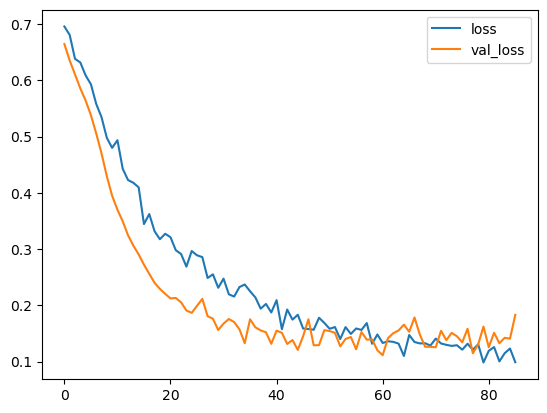

In [113]:
plt.figure(figsize=(14,6))
model_loss.plot()

In [121]:
pred = model.predict(x_test)
predictions = pred.argmax(axis = -1)

5/5 [==============================] - 0s 1000us/step


In [122]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



C:\Users\muham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
print(confusion_matrix(y_test, predictions))

[[55  0]
 [88  0]]
